In [1]:
import os
import sys

%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import ipywidgets as widgets
from ipywidgets import interact
from IPython.display import display

sys.path.insert(1, '../lab1-histogram')
from utils import rgb2gray
from image_normalization import normalize_image
from utils2 import (
    get_factors,
    get_lists_intersection,
)
from integral_image import compute_integral_image

In [2]:
input_image = rgb2gray(mpimg.imread("original_image.jpeg"))

In [3]:
integral_image = compute_integral_image(input_image)

In [4]:
grid_sizes = sorted(get_lists_intersection(get_factors(input_image.shape[0]), get_factors(input_image.shape[1])))
grid_sizes

[1, 2, 4, 5, 10, 20, 25, 50, 100, 125, 250, 500]

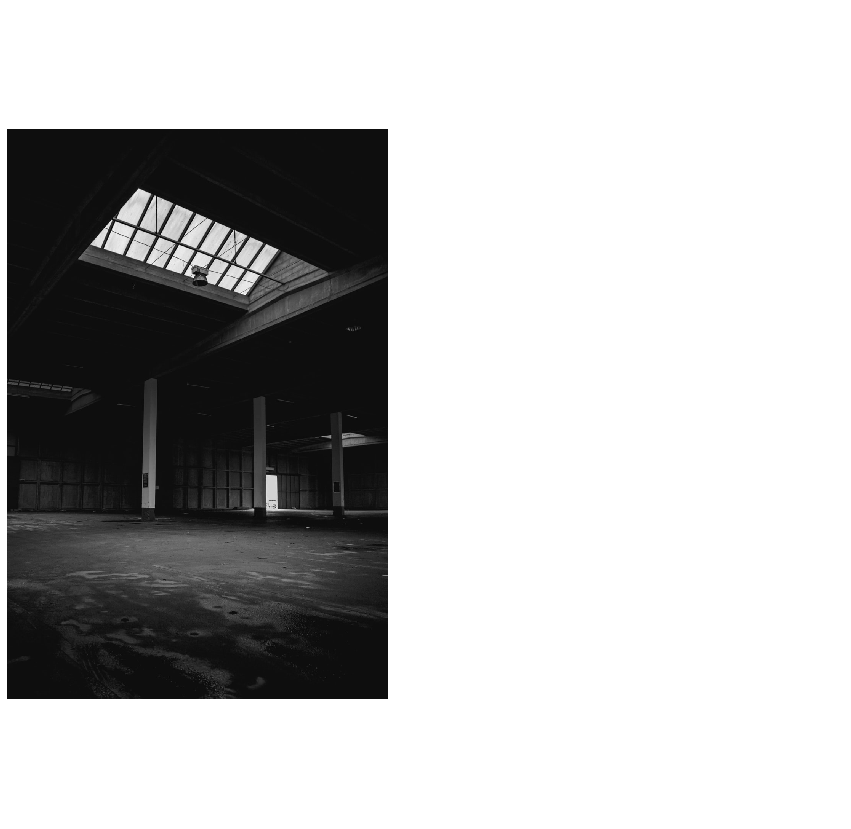

In [7]:
def f(grid_size):
    ax_orig.imshow(input_image, cmap="gray")
    normalized_image = normalize_image(input_image, integral_image, grid_size, 128, 1000)
    ax_norm.imshow(normalized_image, cmap="gray")
    fig.canvas.draw()
    display(fig)


fig = plt.figure(figsize=(15, 15))
ax_orig = fig.add_subplot(121)
ax_norm = fig.add_subplot(122)

ax_orig.imshow(input_image, cmap="gray")
ax_norm.imshow(input_image, cmap="gray")

for ax in [ax_orig, ax_norm]:
    ax.set_axis_off()

In [6]:
widgets.interact(f, grid_size=widgets.Dropdown(options=grid_sizes, value=10, description='Grid size:',
                                                disabled=False))

interactive(children=(Dropdown(description='Grid size:', index=4, options=(1, 2, 4, 5, 10, 20, 25, 50, 100, 12…

<function __main__.f(grid_size)>